In [1]:
import numpy as np
import pandas as pd

import RW
import NRLMF

import math
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score

In [2]:
rna_sim=pd.read_csv('rna_similarity.txt',sep='\t')
prot_sim=pd.read_csv('prot_similarity.txt',sep='\t')
inter=pd.read_csv('list_of_interactions.txt',sep='\t')

rna_cnt=inter['RNA_ID'].unique().shape[0] # m
prot_cnt=inter['PROT_ID'].unique().shape[0] # n

Sl=np.empty((rna_cnt,rna_cnt))
Sp=np.empty((prot_cnt,prot_cnt))

for i in rna_sim.index:
    Sl[rna_sim['RNA(i)'][i]][rna_sim['RNA(j)'][i]]=rna_sim['Sim(i,j)'][i]

for i in prot_sim.index:
    Sp[prot_sim['PROT(i)'][i]][prot_sim['PROT(j)'][i]]=prot_sim['Sim(i,j)'][i]

Y=np.zeros((rna_cnt,prot_cnt))
for i in inter.index:
    Y[inter['RNA_ID'][i]][inter['PROT_ID'][i]]=1

In [3]:
# random_grouping=np.random.choice(rna_cnt,size=rna_cnt,replace=False)
# random_grouping=np.reshape(random_grouping,(10,np.int64(rna_cnt/10)))
# print(random_grouping)
# np.savetxt('IRWNRLMF_CVS1.txt',random_grouping,fmt='%1d')
random_grouping=np.loadtxt('IRWNRLMF_CVS1.txt',dtype=np.int64)
print(random_grouping)

[[ 41 795 648  51 314 555  85 115 548  90 805 675 279 133 636 662  79 768
  868 606 345 739 579 855 881 682  14 230 127 853 355 383  39 922 244 113
  236 568 501 275 488 669 329 680  55 700 178 421 538 298 981 495 181 444
  740 418 285 296  45 604 420 630 760 741 765 796 534 325 558 754 608 882
  778 242 451 129 524 158 409 303 823 511  40 553 121 626 138 820 717 185
  223  38 428 977 144 476 153  60 482]
 [ 59  78 797 893 491  99 632 318  52 199 905 519 749 635 123 753 179 381
  446 126 767  17 356 622 215 156 175 205 137 657 132 416 824 667 970 987
  845 423 769 114 592 429 200  88 932 426 928 436 260 707 150 500 980 344
  589  33 320  98 730 983 798 278 645 417 697 763 521 168 918 266 453 629
  770 956 874 209 352  16  74 371 163 456 889 317 673 292 503 340 312 725
  110  29 419 706 595 574 986  44 396]
 [910 294 257 527 935 672 478 985 427 390 406 591 148 972 134 929 391 369
  880 231  50 342  87 497  26 698 290 597 750 614 844 357 618 164  48 670
  336 452 508 118 393 483 644   6 

In [4]:
tpr_arr=[]
fpr_arr=[]
pre_arr=[]

def update_metrics(y_true,y_pred,tpr_arr,fpr_arr,pre_arr,ds_no):
    data ={'isTrue': y_true, 'Prob': y_pred}
    df=pd.DataFrame(data)
    df.sort_values(by=['Prob'],ascending=False,inplace=True)
    pos=len([i for i in range(len(y_true)) if y_true[i]==True])
    fal=len(y_true)-pos
    thresholds = np.linspace(0,1,500)
    tpr=[]
    fpr=[]
    pre=[]
    for th in thresholds:
        tp=0
        fp=0
        for i in df.index:
            if df['Prob'][i]<th:
                break
            if df['isTrue'][i]==1:
                tp+=1
            else:
                fp+=1
        tpr.append(tp/pos)
        fpr.append(fp/fal)
        if tp+fp!=0:
            pre.append(tp/(tp+fp))
        else:
            pre.append(1)
    tpr_arr.append(tpr)
    fpr_arr.append(fpr)
    pre_arr.append(pre)
    

+++ IRWNRLMF CVS-1: Dataset-0 +++
Negative RNA set=
[41, 795, 648, 51, 314, 555, 85, 115, 548, 90, 805, 675, 279, 133, 636, 662, 79, 768, 868, 606, 345, 739, 579, 855, 881, 682, 14, 230, 127, 853, 355, 383, 39, 922, 244, 113, 236, 568, 501, 275, 488, 669, 329, 680, 55, 700, 178, 421, 538, 298, 981, 495, 181, 444, 740, 418, 285, 296, 45, 604, 420, 630, 760, 741, 765, 796, 534, 325, 558, 754, 608, 882, 778, 242, 451, 129, 524, 158, 409, 303, 823, 511, 40, 553, 121, 626, 138, 820, 717, 185, 223, 38, 428, 977, 144, 476, 153, 60, 482]
Iteration count=8813
AUROC=0.8663847994160181
AUPR=0.5562158822828673
+++ IRWNRLMF CVS-1: Dataset-1 +++
Negative RNA set=
[59, 78, 797, 893, 491, 99, 632, 318, 52, 199, 905, 519, 749, 635, 123, 753, 179, 381, 446, 126, 767, 17, 356, 622, 215, 156, 175, 205, 137, 657, 132, 416, 824, 667, 970, 987, 845, 423, 769, 114, 592, 429, 200, 88, 932, 426, 928, 436, 260, 707, 150, 500, 980, 344, 589, 33, 320, 98, 730, 983, 798, 278, 645, 417, 697, 763, 521, 168, 918, 266,

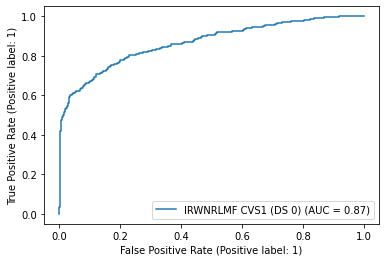

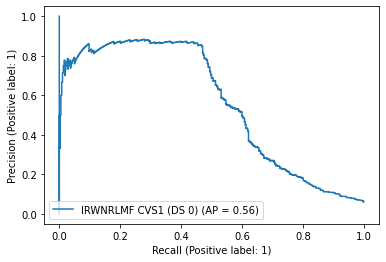

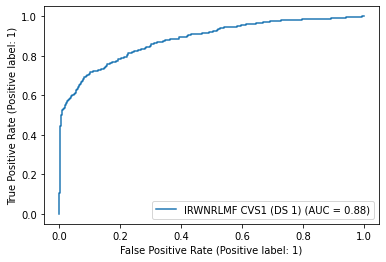

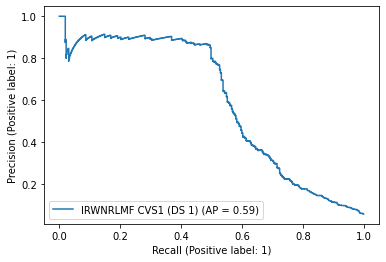

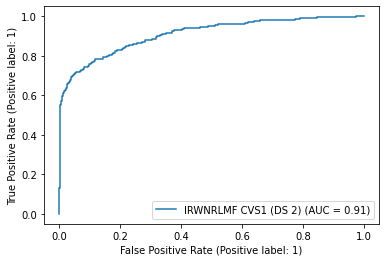

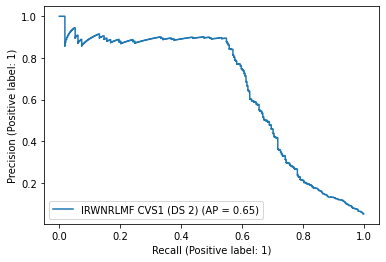

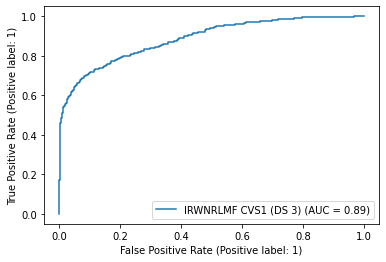

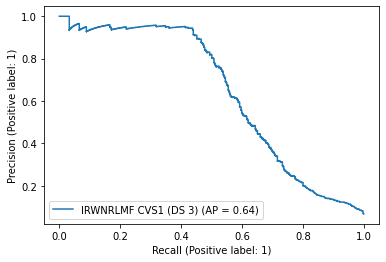

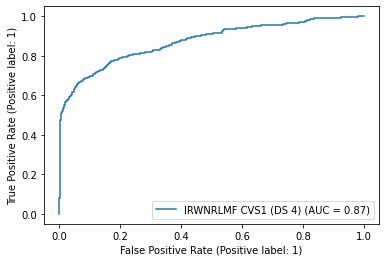

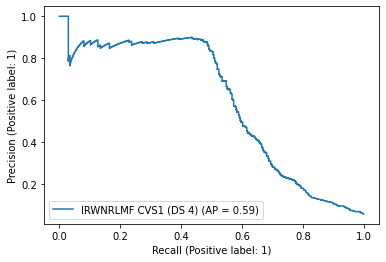

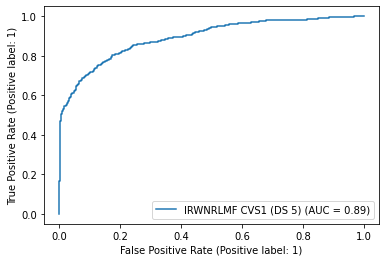

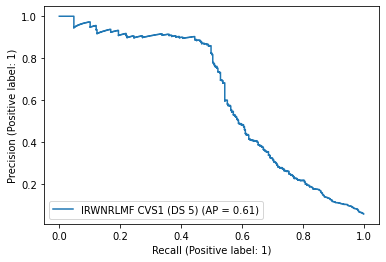

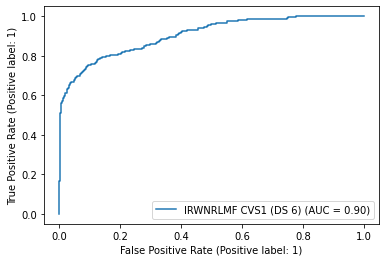

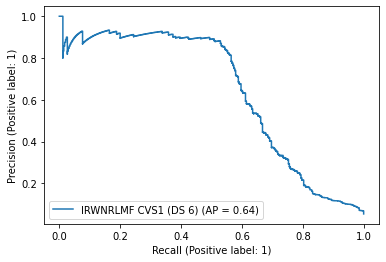

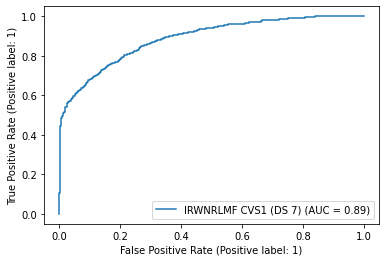

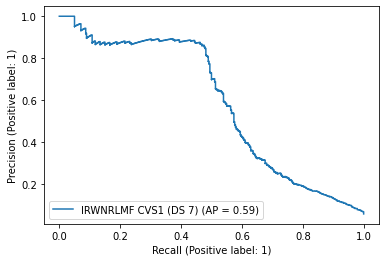

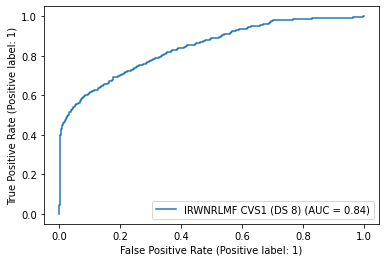

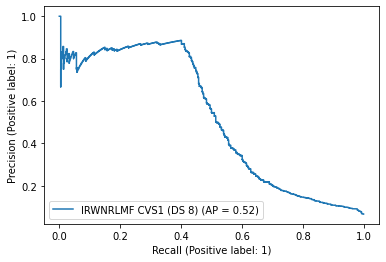

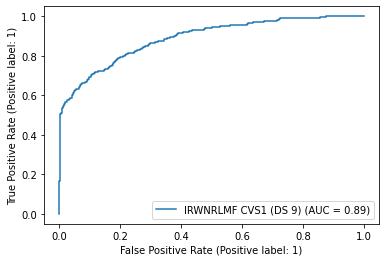

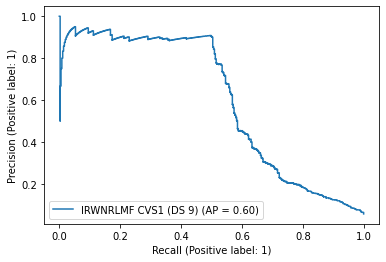

In [5]:
avg_auroc=0
avg_aupr=0
for i in range(10):
    print(f'+++ IRWNRLMF CVS-1: Dataset-{i} +++')
    neg_rna_set=[j for j in random_grouping[i]]
    print('Negative RNA set=',sep=' ')
    print(neg_rna_set)
    y_true=np.empty(0)
    for j in neg_rna_set:
        y_true=np.concatenate((y_true,Y[j]))
    modified_Y=Y.copy()
    for j in neg_rna_set:
        for k in range(prot_cnt):
            modified_Y[j][k]=0
    
    Sr=RW.RW(rna_cnt,prot_cnt,Sl,modified_Y)
    
    U,V=NRLMF.NRLMF(rna_cnt,prot_cnt,Sl,Sp,modified_Y,neg_rna_set)
    Sn=NRLMF.prob(U,V)
    
    P=(Sr+Sn)/2
    
    y_pred=np.empty(0)
    for j in neg_rna_set:
        y_pred=np.concatenate((y_pred,P[j]))
    
    update_metrics(y_true,y_pred,tpr_arr,fpr_arr,pre_arr,i)
    
    auroc=roc_auc_score(y_true, y_pred)
    RocCurveDisplay.from_predictions(y_true,y_pred,name=f'IRWNRLMF CVS1 (DS {i})')
    print(f'AUROC={auroc}')
    avg_auroc+=auroc
    
    aupr=average_precision_score(y_true,y_pred)
    PrecisionRecallDisplay.from_predictions(y_true,y_pred,name=f'IRWNRLMF CVS1 (DS {i})')
    print(f'AUPR={aupr}')
    avg_aupr+=aupr

avg_auroc/=10
avg_aupr/=10
print(f'Average AUROC={avg_auroc}')
print(f'Average AUPR={avg_aupr}')

In [6]:
for i in range(len(tpr_arr)):
    tpr_arr[i].reverse()
    fpr_arr[i].reverse()
    pre_arr[i].reverse()

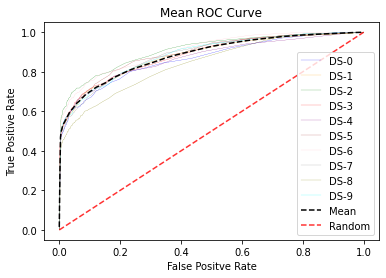

In [7]:
plt.plot(fpr_arr[0],tpr_arr[0],color="blue",linewidth=0.2,label='DS-0')
plt.plot(fpr_arr[1],tpr_arr[1],color="orange",linewidth=0.2,label='DS-1')
plt.plot(fpr_arr[2],tpr_arr[2],color="green",linewidth=0.2,label='DS-2')
plt.plot(fpr_arr[3],tpr_arr[3],color="red",linewidth=0.2,label='DS-3')
plt.plot(fpr_arr[4],tpr_arr[4],color="purple",linewidth=0.2,label='DS-4')
plt.plot(fpr_arr[5],tpr_arr[5],color="brown",linewidth=0.2,label='DS-5')
plt.plot(fpr_arr[6],tpr_arr[6],color="pink",linewidth=0.2,label='DS-6')
plt.plot(fpr_arr[7],tpr_arr[7],color="grey",linewidth=0.2,label='DS-7')
plt.plot(fpr_arr[8],tpr_arr[8],color="olive",linewidth=0.2,label='DS-8')
plt.plot(fpr_arr[9],tpr_arr[9],color="cyan",linewidth=0.2,label='DS-9')

mean_x_axis = [i for i in np.linspace(0,1,500)]
ys_interp = [np.interp(mean_x_axis, fpr_arr[i], tpr_arr[i]) for i in range(len(tpr_arr))]
mean_y_axis = np.mean(ys_interp, axis=0)

#print(ys_interp)

plt.plot(mean_x_axis, mean_y_axis, color="black",linestyle='--',label='Mean')
#plt.show()
plt.title("Mean ROC Curve")
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], linestyle='--', color='r',label='Random', alpha=.8)
plt.legend()
plt.savefig('IRWNRLMF_CVS1_ROC.pdf')

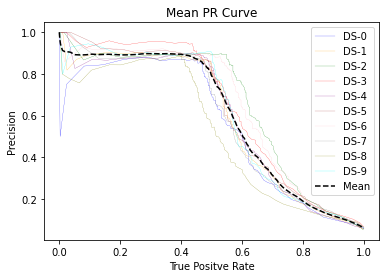

In [8]:
plt.plot(tpr_arr[0],pre_arr[0],color="blue",linewidth=0.2,label='DS-0')
plt.plot(tpr_arr[1],pre_arr[1],color="orange",linewidth=0.2,label='DS-1')
plt.plot(tpr_arr[2],pre_arr[2],color="green",linewidth=0.2,label='DS-2')
plt.plot(tpr_arr[3],pre_arr[3],color="red",linewidth=0.2,label='DS-3')
plt.plot(tpr_arr[4],pre_arr[4],color="purple",linewidth=0.2,label='DS-4')
plt.plot(tpr_arr[5],pre_arr[5],color="brown",linewidth=0.2,label='DS-5')
plt.plot(tpr_arr[6],pre_arr[6],color="pink",linewidth=0.2,label='DS-6')
plt.plot(tpr_arr[7],pre_arr[7],color="grey",linewidth=0.2,label='DS-7')
plt.plot(tpr_arr[8],pre_arr[8],color="olive",linewidth=0.2,label='DS-8')
plt.plot(tpr_arr[9],pre_arr[9],color="cyan",linewidth=0.2,label='DS-9')

mean_x_axis = [i for i in np.linspace(0,1,500)]
ys_interp = [np.interp(mean_x_axis, tpr_arr[i], pre_arr[i]) for i in range(len(tpr_arr))]
mean_y_axis = np.mean(ys_interp, axis=0)

#print(ys_interp)

plt.plot(mean_x_axis, mean_y_axis, color="black",linestyle='--',label='Mean')
#plt.show()
plt.title("Mean PR Curve")
plt.xlabel("True Positve Rate")
plt.ylabel("Precision")

plt.legend()
plt.savefig('IRWNRLMF_CVS1_PRC.pdf')